# Image Analytics in Marketing Code Examples

This notebook is part of the book ___

### Introduction


We present a few basic examples of the techniques described in the chapter, including different level of feature extraction, and a Neural Network classifier.

In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import random
import cv2 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.image as mpimg
%matplotlib inline

### Predefined Feature Extraction

We start with a few types of features that can be extracted from an image.

First, we load a pictrure and display it.

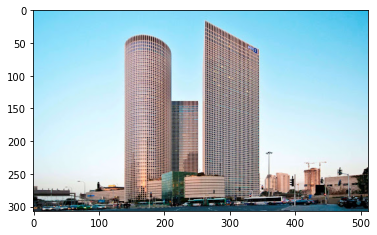

In [29]:
img = mpimg.imread('azreali.jpg')
imgplot = plt.imshow(img)
plt.show()

One example of a low level feature is color hostograms, which capture the distribution of the color composition of the image.

<u>Grayscale Histogram<u>

This is our image in the black and white display

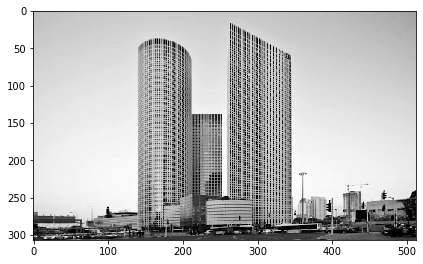

In [30]:
img_gray = imread('azreali.jpg',as_gray=True)
imshow(img_gray)

We can creat a color histogram for the grayscale image, counting the intensity of each pixel, ranging between 0 as black and 256 as white.

(0.0, 256.0)

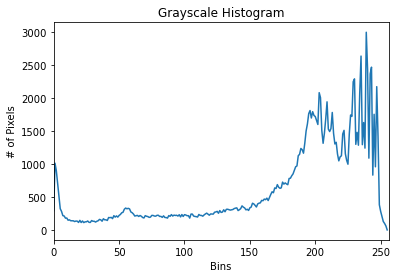

In [31]:
image = cv2.imread('azreali.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

 In our picture we see very few “black” pixels in the image, mainly "white"

<u>RGB Histogram<u>

Next, we can create a color histogam for the RGB color space, again with 0 representing the lowest intenisty of the color and 256 the highest intensity

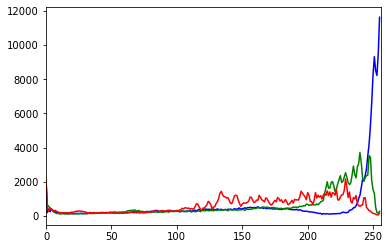

In [32]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Another dimension of interest is shape, where the features are line directions, corners, and curves. We will give two examples for extraction of these types of features, which could be classified as "meduim" level features.

<u>SIFT: Scale-invariant feature transform<u>

Keypoints of the image, that usually lie on object edges, are extracted and can be used to detect the object in an image containing the object

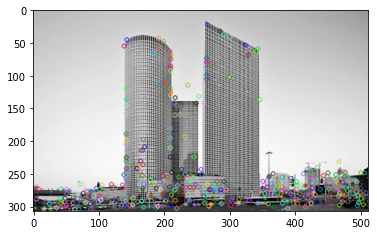

In [33]:
#SIFT
#reading image
img1 = cv2.imread('azreali.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

<u>HOG: Histogram of Oriented Gradients<u>

HOG descriptor extracts the edge directions in an image, and is used for object detection

The image shape is (602, 1200, 3)


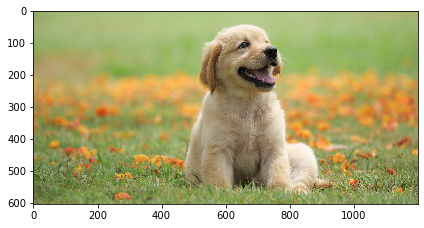

In [34]:
#reading the image 
image = imread('dog.jpg')
imshow(image)
print('The image shape is '+str(image.shape))

The resized image shape is (128, 64, 3)


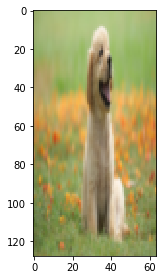

In [35]:
#resizing image
resized_img = resize(image, (128,64)) 
imshow(resized_img) 
print('The resized image shape is '+str(resized_img.shape))


In [36]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)


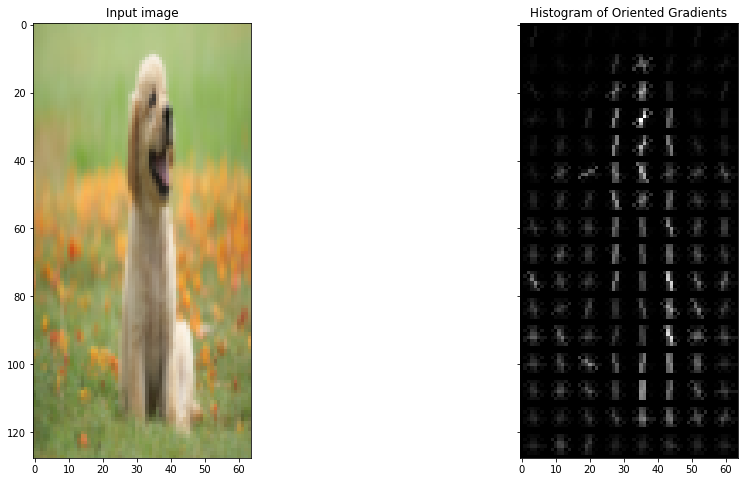

In [37]:
# Rescale histogram for better display 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

We can also exctract from images interpretable features.

<u>Image Tags<u>

One type of "high level" features are tags. Using tagging software we can identify the objects, activities, sceneries, and themes presented in the image. Thus, the image is described by a set of words or tags, which serve as the features.

An example of tagging software is "Clarifai", which also has an Python API. In order to use their model, there is a need to open an account and create an API key for you application

In [38]:
import clarifai
from clarifai.rest import ClarifaiApp

#creating an app of clarifai with the API key from the acount created
API_KEY='689d360c6a4342e19365bfc53c21593b'
app = ClarifaiApp(api_key=API_KEY)


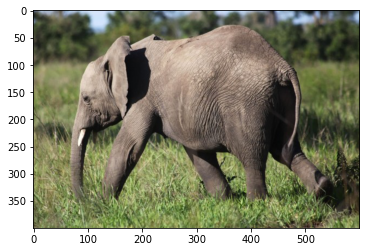

In [39]:
#showing the image
img = mpimg.imread("elaphent.jpg")
imgplot = plt.imshow(img)
plt.show()

In [40]:
#using genreal model of clarifai to extract taggs from the image
model = app.public_models.general_model
response = model.predict_by_filename("elaphent.jpg")

In [41]:
#printing tags and tag probability
if(response['status']['description'] == "Ok"):
    for concept in response["outputs"][0]["data"]["concepts"]:
        name = concept["name"]
        value = concept["value"]
        print(name + " " + str(value))

wildlife 0.99827564
elephant 0.9976928
mammal 0.9962359
no person 0.99166167
ivory 0.98950046
grass 0.98490936
african elephant 0.9844232
safari 0.9802783
nature 0.98003685
animal 0.9771493
large 0.9696601
wild 0.96826786
outdoors 0.953126
trunk 0.9451795
barbaric 0.944115
endangered species 0.94366425
savanna 0.9420985
Kruger 0.9286655
grassland 0.9276549
immense 0.92535317


In [ ]:
# Copy next 1000 elephants images to test_elephants_dir
# path=r'C:\Users\Owner\Dropbox\14- Market Research Book Chapter\ful data\train_elephants'
# files=os.listdir(path)
# src=np.random.choice(files,1000,replace=False)
# dst=r'C:\Users\Owner\Dropbox\14- Market Research Book Chapter\ful data\test_elephants'
# for f in src:
#     shutil.move(path+'\\'+f, dst)

In [ ]:
# path=r'C:\Users\Owner\Dropbox\14- Market Research Book Chapter\ful data\train_zebras'
# files=os.listdir(path)
# src=np.random.choice(files,1000,replace=False)
# dst=r'C:\Users\Owner\Dropbox\14- Market Research Book Chapter\ful data\test_zebras'
# for f in src:
#     shutil.move(path+'\\'+f, dst)

In [5]:
# # Copy next 1000 elephants images to test_elephants_dir
# path=r'E:\Dropbox\14- Market Research Book Chapter\ful data\train\elephant'
# files=os.listdir(path)
# src=np.random.choice(files,200,replace=False)
# dst=r'E:\Dropbox\14- Market Research Book Chapter\ful data\test\elephant'
# for f in src:
#     shutil.move(path+'\\'+f, dst)

### Convolutional Neural Network Classifier

This part was written based on the tutorial:
https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751

We present an example of a Convolutional Neural Network (CNN) classifier that uses transfer learning- namely, applying a network that has already been trained by someone else for a different purpose. 

Our task is to classify between two types of images: elephants and zebras. We execute transfer learning by fine tuning the pre-trained CNN. The fine tuning approach trains the CNN, but instead of initializing the model parameters with random numbers, the model is initialized with parameters learned from another NN. Our model is built from a convelutional base (a VGG16 Neural Netwrok, pre-trained on ImageNet) which generates features from the image, and a classifier (a stack of fully-connected layers), which classifies the image based on the detected features.

*Defining our directories*

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image

In [6]:
# place the name, change the name
base_dir = r'E:\Dropbox\14- Market Research Book Chapter\convolutional_neural_network_data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir, 'validation')
elephant_train_dir=os.path.join(train_dir,'elephant')
zebra_train_dir= os.path.join(train_dir,'zebra')
elephant_validation_dir=os.path.join(validation_dir,'elephant')
zebra_validation_dir=os.path.join(validation_dir,'zebra')
elephant_test_dir = os.path.join(test_dir,'elephant')
zebra_test_dir = os.path.join(test_dir,'zebra')
print('Total training elephant images:', len(os.listdir(elephant_train_dir)))
print('Total training zebra images:', len(os.listdir(zebra_train_dir)))
print('Total validation elephant images:', len(os.listdir(elephant_validation_dir)))
print('Total validation zebra images:', len(os.listdir(zebra_validation_dir)))
print('Total test elephant images:', len(os.listdir(elephant_test_dir)))
print('Total test zebra images:', len(os.listdir(zebra_test_dir)))

Total training elephant images: 4800
Total training zebra images: 5799
Total validation elephant images: 1000
Total validation zebra images: 1000
Total test elephant images: 200
Total test zebra images: 200


In [13]:
img_width, img_height = 224, 224  # Default input size for VGG16
train_size=10599
validation_size=2000
test_size=400

*Extracting features from the images using the convolutional base*

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    # return a tf.data.Dataset that yields batches of images from the subdirectories class_elephant and class_zebra,
    #together with labels 0 and 1 (0 corresponding to class_elephant and 1 corresponding to class_zebra).
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


*Instantiate the pre-trained convolutional base (VGG16)*

In [9]:
#Instantiate convolutional base
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))  # 3 = number of channels in RGB pictures

58892288/58889256 [==============================] - 5s 0us/step


In [10]:
# Check architecture
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
#consumes computational power
#creating training features
train_features, train_labels = extract_features(train_dir, train_size) 


Found 10599 images belonging to 2 classes.


In [15]:
#creating validation features
validation_features, validation_labels = extract_features(validation_dir, validation_size)

Found 2000 images belonging to 2 classes.


In [16]:
train_labels

array([1., 0., 0., ..., 1., 0., 0.])

*Creating the classifier*

add explnation about the process

In [25]:
epochs = 100
# from tensorflow.keras.models import Sequential
model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])
              
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                   validation_data=(validation_features, validation_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
332/332 [==============================] - 5s 14ms/step - loss: 0.5300 - acc: 0.8217 - val_loss: 0.1283 - val_acc: 0.9555
Epoch 2/100
332/332 [==============================] - 4s 12ms/step - loss: 0.1447 - acc: 0.9416 - val_loss:

332/332 [==============================] - 4s 12ms/step - loss: 0.0268 - acc: 0.9873 - val_loss: 0.0555 - val_acc: 0.9915
Epoch 56/100
332/332 [==============================] - 4s 12ms/step - loss: 0.0245 - acc: 0.9901 - val_loss: 0.1031 - val_acc: 0.9850
Epoch 57/100
332/332 [==============================] - 4s 12ms/step - loss: 0.0239 - acc: 0.9902 - val_loss: 0.0695 - val_acc: 0.9905
Epoch 58/100
332/332 [==============================] - 4s 12ms/step - loss: 0.0262 - acc: 0.9893 - val_loss: 0.0611 - val_acc: 0.9870
Epoch 59/100
332/332 [==============================] - 4s 12ms/step - loss: 0.0397 - acc: 0.9834 - val_loss: 0.0654 - val_acc: 0.9905
Epoch 60/100
332/332 [==============================] - 4s 12ms/step - loss: 0.0195 - acc: 0.9920 - val_loss: 0.0793 - val_acc: 0.9860
Epoch 61/100
332/332 [==============================] - 4s 12ms/step - loss: 0.0220 - acc: 0.9905 - val_loss: 0.0841 - val_acc: 0.9885
Epoch 62/100
332/332 [==============================] - 4s 12ms/step

*Evaluating the Model*

In [ ]:
evaluation

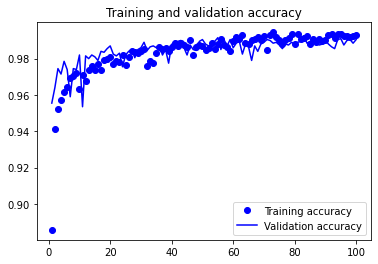

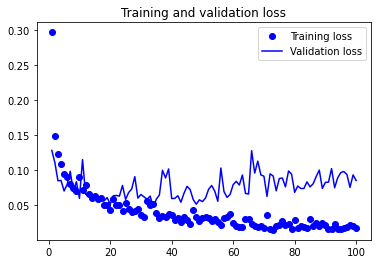

In [26]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

*Testing the Model*

In [27]:
def visualize_predictions(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([elephant_test_dir, zebra_test_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction < 0.5:
            print('elephant')
        else:
            print('zebra')

In [ ]:
explination

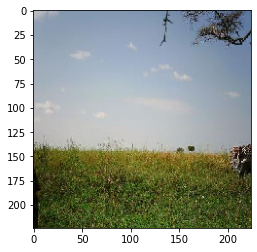

zebra


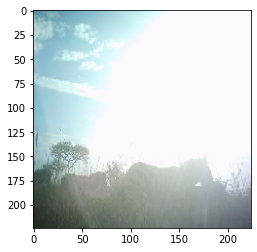

zebra


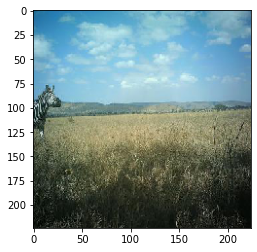

zebra


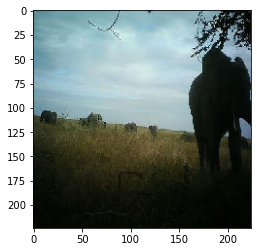

elephant


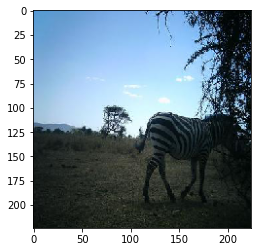

zebra


In [28]:
# Visualize predictions
visualize_predictions(model, 5)